In [2]:
import pandas as pd

df = pd.read_csv('E:/Document/04_11_under-oversampling/basetable.csv', sep=',')
df

,v_gene,j_gene,cdr3_length,v_deletions,j_deletions,d5_deletions,d3_deletions,n1_insertions,n2_insertions,CD4/8
0,TRBV29-01,TRBJ02-05,30,23,5,4,0,2,0,CD4
1,TRBV10-03,TRBJ02-05,39,11,5,0,9,4,7,CD4
2,TRBV24-01,TRBJ01-02,42,12,0,0,2,0,6,CD4
3,TRBV06-05,TRBJ02-02,36,11,8,7,0,1,9,CD4
4,TRBV07-02,TRBJ02-03,45,11,4,2,3,4,11,CD4
...,...,...,...,...,...,...,...,...,...,...
14027617,TRBV11-02,TRBJ02-05,42,4,5,0,3,2,3,CD8
14027618,TRBV26,TRBJ01-02,51,3,4,1,8,13,5,CD8
14027619,TRBV29-01,TRBJ01-03,48,7,0,9,0,6,6,CD8
14027620,TRBV19,TRBJ02-05,30,16,2,3,5,0,7,CD8


In [3]:
print(len(df[df['CD4/8'] == 'CD4']))
print(len(df[df['CD4/8'] == 'CD8']))

9256751
4770871


In [8]:
gene_df = df[['j_gene', 'CD4/8']].reset_index(drop=True)

In [9]:
v_list = ['TRBV11-03', 'TRBV07-09', 'TRBV07-02', 'TRBV04-02', 'TRBV27', 'TRBV11-01',
          'TRBV29-01', 'TRBV03-01', 'TRBV13', 'TRBV05-04', 'TRBV10-01', 'TRBV06-04',
          'TRBV05-01', 'TRBV20-01', 'TRBV12-03', 'TRBV14', 'TRBV28', 'TRBV07-03',
          'TRBV10-03', 'TRBV02', 'TRBV12-05', 'TRBV04-01', 'TRBV19', 'TRBV18',
          'TRBV06-06', 'TRBV21-01', 'TRBV16', 'TRBV07-08', 'TRBV06-02', 'TRBV11-02',
          'TRBV07-06', 'TRBV09', 'TRBV24-01', 'TRBV05-08', 'TRBV23-01', 'TRBV06-05',
          'TRBV30', 'TRBV05-06', 'TRBV06-01', 'TRBV05-05', 'TRBV07-07', 'TRBV15',
          'TRBV10-02', 'TRBV25-01', 'TRBV07-01', 'TRBV06-08', 'TRBV07-04', 'TRBV12-02',
          'TRBV06-09', 'TRBV05-07', 'TRBV12-01', 'TRBV01', 'TRBV06-07', 'TRBV05-03',
          'TRBV17', 'TRBV07-05', 'TRBV05-02', 'TRBV22-01', 'TRBV08-02', 'TRBV26']
j_list = ['TRBJ01-01', 'TRBJ01-06', 'TRBJ02-07', 'TRBJ02-04', 'TRBJ02-02', 'TRBJ02-01',
          'TRBJ02-03', 'TRBJ01-02', 'TRBJ01-03', 'TRBJ02-05', 'TRBJ02-06', 'TRBJ01-04',
          'TRBJ01-05']

In [10]:
prob_df = pd.DataFrame()
for gene in j_list:
    print(gene)
    gene_cd4 = gene_df[(gene_df['j_gene'].str.contains(f'{gene}', na=False)) & (gene_df['CD4/8'] == 'CD4')]
    gene_cd8 = gene_df[(gene_df['j_gene'].str.contains(f'{gene}', na=False)) & (gene_df['CD4/8'] == 'CD8')]
    
    p_cd4 = len(gene_cd4) / len(df[df['CD4/8'] == 'CD4'])
    p_cd8 = len(gene_cd8) / len(df[df['CD4/8'] == 'CD8'])
    gene_sum = p_cd4 + p_cd8
    
    ratio = p_cd4 / p_cd8
    
    norm_p_cd4 = p_cd4 / gene_sum
    norm_p_cd8 = p_cd8 / gene_sum
    
    model = ({
        'j_gene': [f'{gene}'],
        'CD4_P': [norm_p_cd4],
        'CD8_P': [norm_p_cd8]
    })
    
    test_df = pd.DataFrame(model)
    prob_df = pd.concat([prob_df, test_df], ignore_index=True, sort=False)
    print(prob_df)

TRBJ01-01
      j_gene     CD4_P     CD8_P
0  TRBJ01-01  0.510509  0.489491
TRBJ01-06
      j_gene     CD4_P     CD8_P
0  TRBJ01-01  0.510509  0.489491
1  TRBJ01-06  0.620762  0.379238
TRBJ02-07
      j_gene     CD4_P     CD8_P
0  TRBJ01-01  0.510509  0.489491
1  TRBJ01-06  0.620762  0.379238
2  TRBJ02-07  0.419239  0.580761
TRBJ02-04
      j_gene     CD4_P     CD8_P
0  TRBJ01-01  0.510509  0.489491
1  TRBJ01-06  0.620762  0.379238
2  TRBJ02-07  0.419239  0.580761
3  TRBJ02-04  0.561980  0.438020
TRBJ02-02
      j_gene     CD4_P     CD8_P
0  TRBJ01-01  0.510509  0.489491
1  TRBJ01-06  0.620762  0.379238
2  TRBJ02-07  0.419239  0.580761
3  TRBJ02-04  0.561980  0.438020
4  TRBJ02-02  0.505748  0.494252
TRBJ02-01
      j_gene     CD4_P     CD8_P
0  TRBJ01-01  0.510509  0.489491
1  TRBJ01-06  0.620762  0.379238
2  TRBJ02-07  0.419239  0.580761
3  TRBJ02-04  0.561980  0.438020
4  TRBJ02-02  0.505748  0.494252
5  TRBJ02-01  0.440948  0.559052
TRBJ02-03
      j_gene     CD4_P     CD8_P
0  TRB

In [2]:
cd4_df = pd.DataFrame()
cd4_df[['j_gene', 'probability']] = prob_df[['j_gene', 'CD4_P']]
cd4_df['factor'] = 'CD4'
# print(cd4_df)

cd8_df = pd.DataFrame()
cd8_df[['j_gene', 'probability']] = prob_df[['j_gene', 'CD8_P']]
cd8_df['factor'] = 'CD8'

result_df = pd.concat([cd4_df, cd8_df], ignore_index=True, sort=False)
print(result_df)
result_df.to_csv('./j_gene_percentage.csv', sep='\t', index=False)

NameError: name 'pd' is not defined

In [3]:
import pandas as pd

result_df = pd.read_csv('./j_gene_percentage.csv', sep='\t')

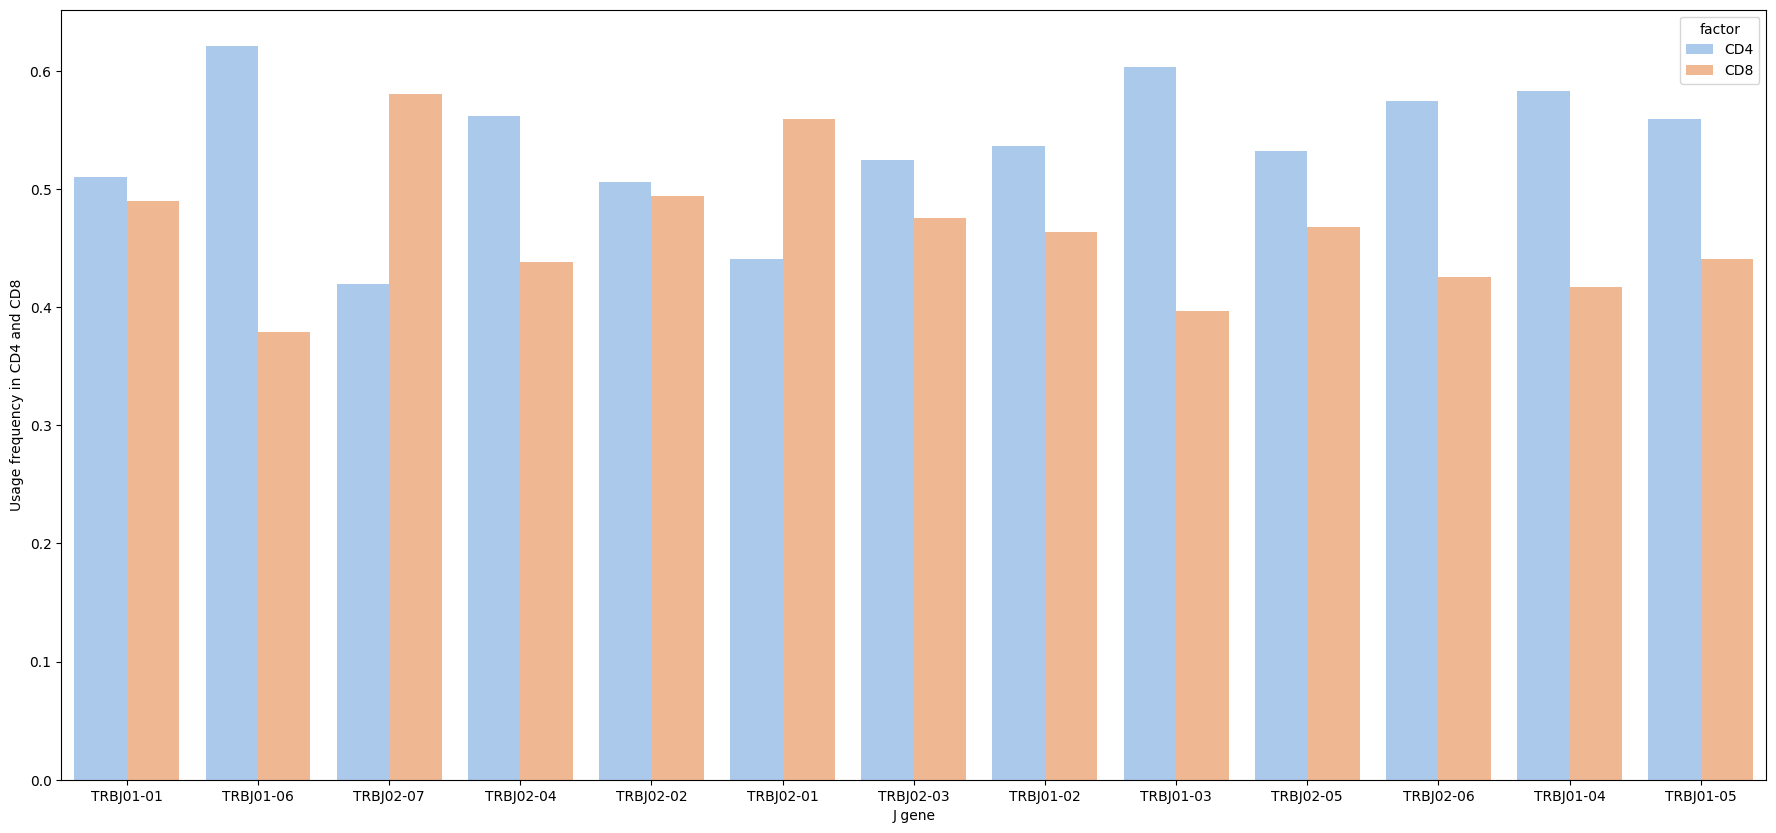

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(data=result_df, x='j_gene', y='probability', hue='factor',  palette="pastel")
ax.figure.set_size_inches(22, 10)
ax.set_xlabel('J gene')
ax.set_ylabel('Usage frequency in CD4 and CD8')
plt.xticks(rotation=0)
plt.show()